##  Define Problem & Hypothesis

### Research Question 1:
**Question:** Does parental level of education correlate with student exam performance?
- **H₀ (Null Hypothesis):** There is no association between parental education level and student exam scores.
- **H₁ (Alternative Hypothesis):** Higher parental education level is associated with higher student exam scores.

### Research Question 2:
**Question:** Does lunch type affect math scores?
- **H₀:** Lunch type (standard vs free/reduced) has no effect on students' math scores.
- **H₁:** Students with standard lunch have different math scores than those with free/reduced lunch.

### Research Question 3:
**Question:** Does completing the test preparation course influence reading and writing scores?
- **H₀:** Completion of test preparation course does not affect reading and writing scores.
- **H₁:** Students who completed the test preparation course have higher reading and writing scores than those who did not.


In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:

# Set visualization style
sns.set(style="whitegrid")

# Load Dataset

df = pd.read_csv("StudentsPerformance.csv")

# Quick look
print(df.head())
print("\nShape:", df.shape)  #display rows and column of dataset
print("\nMissing values:\n", df.isnull().sum())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Shape: (1000, 8)

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                   


Summary statistics:
        math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


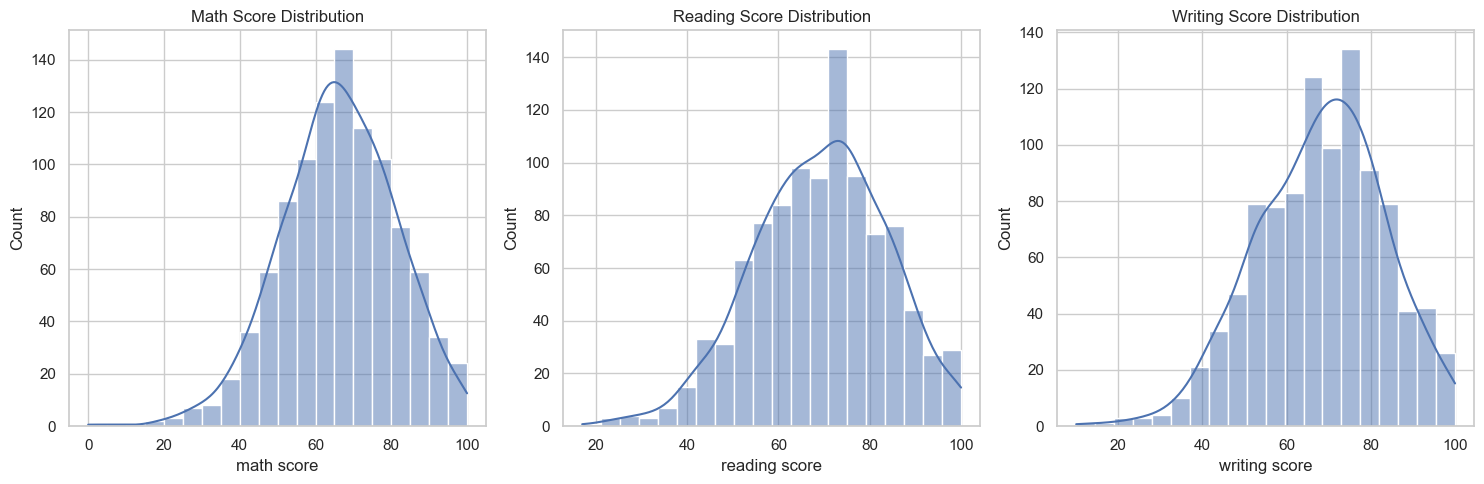

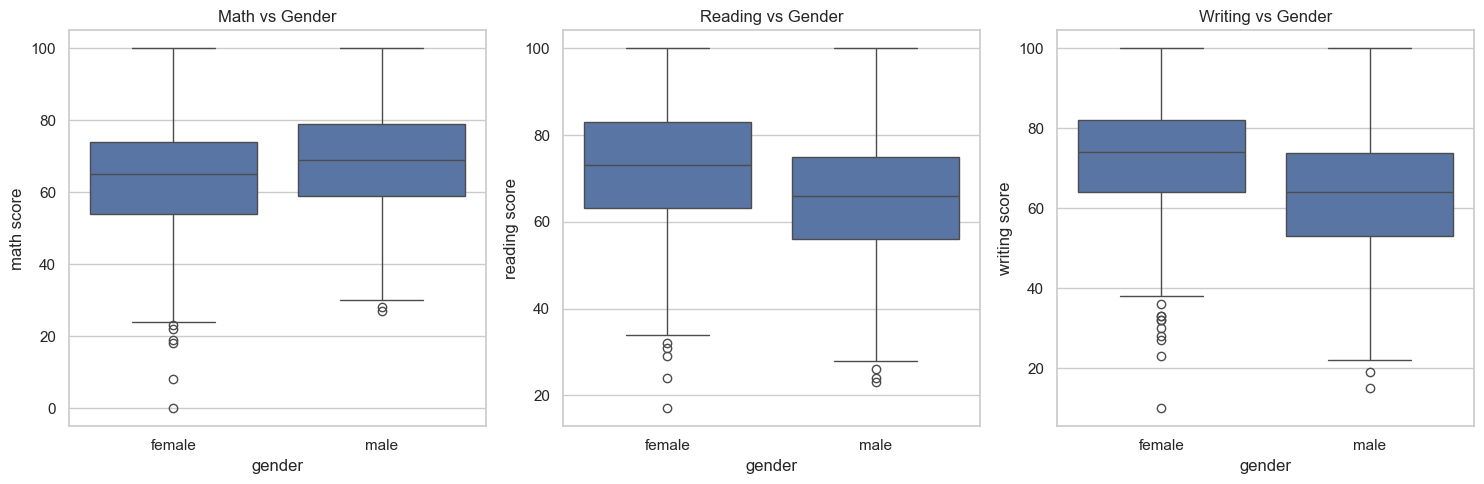

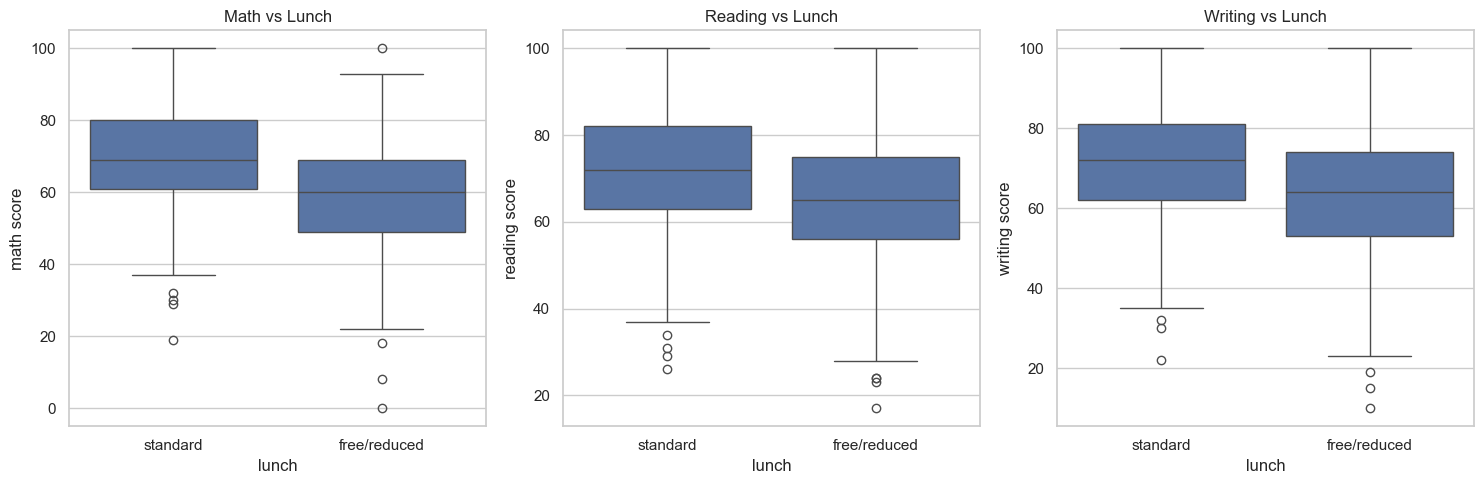

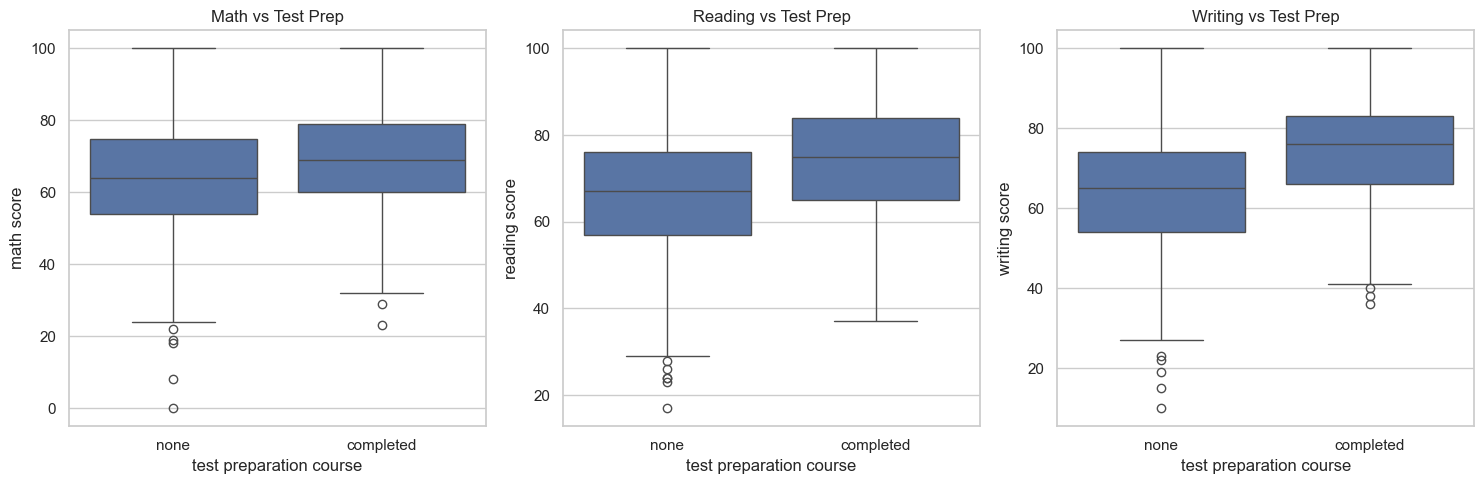

<Figure size 1000x500 with 0 Axes>

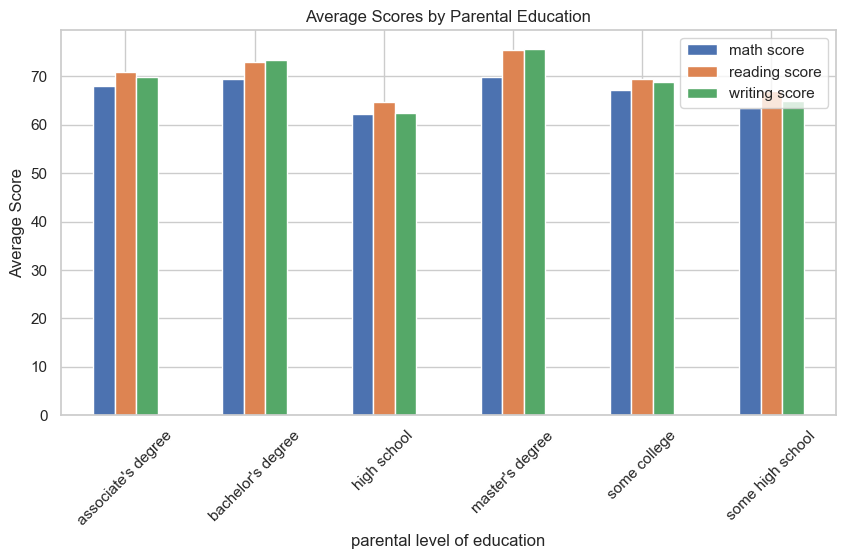

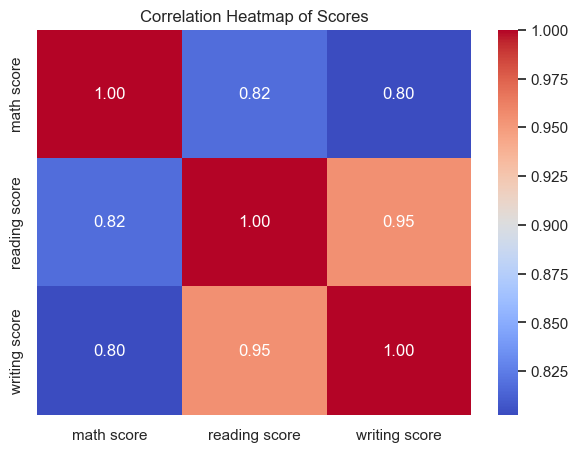

In [4]:
# Basic EDA

# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Distribution of Scores
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['math score'], kde=True, ax=axes[0], bins=20).set_title("Math Score Distribution")
sns.histplot(df['reading score'], kde=True, ax=axes[1], bins=20).set_title("Reading Score Distribution")
sns.histplot(df['writing score'], kde=True, ax=axes[2], bins=20).set_title("Writing Score Distribution")
plt.tight_layout()
plt.show()

# Boxplots by Gender
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x="gender", y="math score", data=df, ax=axes[0])
sns.boxplot(x="gender", y="reading score", data=df, ax=axes[1])
sns.boxplot(x="gender", y="writing score", data=df, ax=axes[2])
axes[0].set_title("Math vs Gender")
axes[1].set_title("Reading vs Gender")
axes[2].set_title("Writing vs Gender")
plt.tight_layout()
plt.show()

# Boxplots by Lunch
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x="lunch", y="math score", data=df, ax=axes[0])
sns.boxplot(x="lunch", y="reading score", data=df, ax=axes[1])
sns.boxplot(x="lunch", y="writing score", data=df, ax=axes[2])
axes[0].set_title("Math vs Lunch")
axes[1].set_title("Reading vs Lunch")
axes[2].set_title("Writing vs Lunch")
plt.tight_layout()
plt.show()

# Boxplots by Test Preparation
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x="test preparation course", y="math score", data=df, ax=axes[0])
sns.boxplot(x="test preparation course", y="reading score", data=df, ax=axes[1])
sns.boxplot(x="test preparation course", y="writing score", data=df, ax=axes[2])
axes[0].set_title("Math vs Test Prep")
axes[1].set_title("Reading vs Test Prep")
axes[2].set_title("Writing vs Test Prep")
plt.tight_layout()
plt.show()

# Average Scores by Parental Education
plt.figure(figsize=(10,5))
parent_means = df.groupby("parental level of education")[['math score','reading score','writing score']].mean()
parent_means.plot(kind="bar", figsize=(10,5))
plt.title("Average Scores by Parental Education")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Scores")
plt.show()
